In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings ('ignore')
warnings.filterwarnings ('ignore', category = DeprecationWarning)
from xgboost import XGBRegressor
from google.colab import files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_path = '/content/drive/MyDrive/Research M.Sc Optics/Dataset.csv'
df = pd.read_csv(data_path)

In [6]:
df.head()

,Layer,Analyte,Thickness plasmonics nm,Thicknes analyte nm,Core Diameter nm,Wavelength,Core Real,Core Imaginary,Confinement Loss
0,Au,1.4174,30,1570,3000,1000,1.444874,0.000348,190.010918
1,Au,1.4174,30,1570,3000,1050,1.443833,0.000054,28.287710
2,Au,1.4174,30,1570,3000,1100,1.442562,0.000034,17.092872
3,Au,1.4174,30,1570,3000,1150,1.441294,0.000042,19.961608
4,Au,1.4174,30,1570,3000,1200,1.439975,0.000068,30.959682


In [7]:
df.shape

(405, 9)

In [8]:
corr = df.corr().round(2)

In [9]:
corr

,Analyte,Thickness plasmonics nm,Thicknes analyte nm,Core Diameter nm,Wavelength,Core Real,Core Imaginary,Confinement Loss
Analyte,1.00,0.11,0.27,-0.00,-0.00,0.01,-0.10,-0.11
Thickness plasmonics nm,0.11,1.00,0.18,-0.00,-0.00,0.01,-0.07,-0.05
Thicknes analyte nm,0.27,0.18,1.00,-0.00,-0.00,0.00,-0.00,-0.00
Core Diameter nm,-0.00,-0.00,-0.00,1.00,0.00,0.16,0.03,0.03
Wavelength,-0.00,-0.00,-0.00,0.00,1.00,-0.98,-0.03,-0.11
Core Real,0.01,0.01,0.00,0.16,-0.98,1.00,0.01,0.09
Core Imaginary,-0.10,-0.07,-0.00,0.03,-0.03,0.01,1.00,0.99
Confinement Loss,-0.11,-0.05,-0.00,0.03,-0.11,0.09,0.99,1.00


In [10]:
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

In [11]:
mask

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

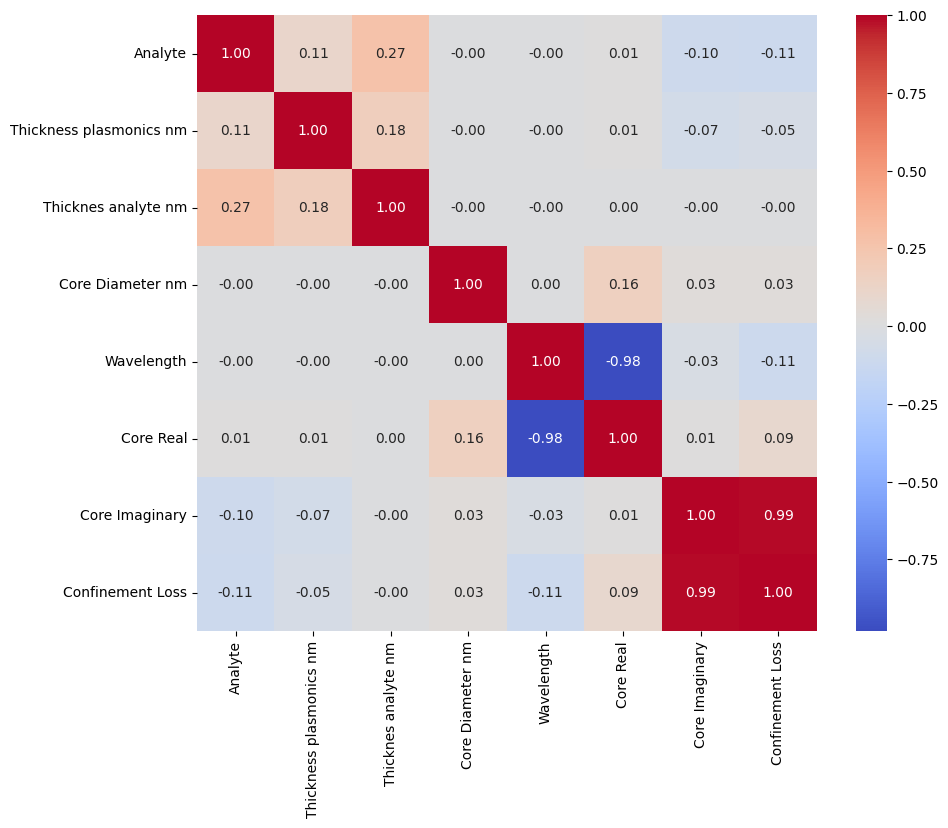

In [13]:
# sns.heatmap(corr, annot=True, cmap='coolwarm')
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap using seaborn
sb.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)

# Add title and show the figure
# plt.title("Correlation Heatmap")
plt.show()

In [14]:
fig.tight_layout()

In [15]:
fig.savefig('corrVis.tif', dpi=600, bbox_inches='tight')

In [16]:
dummy_fields = ["Layer"]

for each in dummy_fields:
    dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df,dummies], axis=1)

In [17]:
fields_to_drop = ["Layer"]
df = df.drop(fields_to_drop, axis=1)

In [18]:
df.head()

,Analyte,Thickness plasmonics nm,Thicknes analyte nm,Core Diameter nm,Wavelength,Core Real,Core Imaginary,Confinement Loss,Layer_Au,Layer_ni,Layer_pt
0,1.4174,30,1570,3000,1000,1.444874,0.000348,190.010918,1,0,0
1,1.4174,30,1570,3000,1050,1.443833,0.000054,28.287710,1,0,0
2,1.4174,30,1570,3000,1100,1.442562,0.000034,17.092872,1,0,0
3,1.4174,30,1570,3000,1150,1.441294,0.000042,19.961608,1,0,0
4,1.4174,30,1570,3000,1200,1.439975,0.000068,30.959682,1,0,0


In [19]:
for each in df.columns:
  print(each,' '*(20-len(each)), df[each].isnull().values.any())

Analyte               False
Thickness plasmonics nm  False
Thicknes analyte nm   False
Core Diameter nm      False
Wavelength            False
Core Real             False
Core Imaginary        False
Confinement Loss      False
Layer_Au              False
Layer_ni              False
Layer_pt              False


In [20]:
tar = ['Core Real', 'Core Imaginary', 'Confinement Loss']

x = df[["Layer_Au",	"Layer_ni",	"Layer_pt","Analyte","Thickness plasmonics nm","Thicknes analyte nm","Core Diameter nm", "Wavelength"]]
y = df[tar]

In [21]:
x.head()

,Layer_Au,Layer_ni,Layer_pt,Analyte,Thickness plasmonics nm,Thicknes analyte nm,Core Diameter nm,Wavelength
0,1,0,0,1.4174,30,1570,3000,1000
1,1,0,0,1.4174,30,1570,3000,1050
2,1,0,0,1.4174,30,1570,3000,1100
3,1,0,0,1.4174,30,1570,3000,1150
4,1,0,0,1.4174,30,1570,3000,1200


In [22]:
quant_features = tar
scaled_features = {}

for each in quant_features:
    mean, std = y[each].mean(), y[each].std()
    scaled_features[each] = [mean, std]
    y.loc[:, each] = (y[each] - mean)/std

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=45)

In [24]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [25]:
X_train[0:5,:]

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, 1.4174e+00, 3.0000e+01,
        9.4000e+02, 3.0000e+03, 1.6000e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 1.4276e+00, 3.0000e+01,
        1.5700e+03, 3.0000e+03, 1.6500e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 1.4276e+00, 3.5000e+01,
        1.5700e+03, 3.0000e+03, 1.6000e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, 1.4242e+00, 3.0000e+01,
        9.4000e+02, 3.0000e+03, 1.2500e+03],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, 1.4174e+00, 3.0000e+01,
        9.4000e+02, 3.0000e+03, 1.0500e+03]])

In [26]:
y_train[0:5,:]

array([[-1.19467244,  0.42586331,  0.2251589 ],
       [-1.40283951, -0.597094  , -0.64207162],
       [-1.13706633, -0.63273251, -0.66832845],
       [ 0.5213199 , -0.08011557, -0.04646559],
       [ 1.35735869,  0.33346717,  0.62578428]])

In [27]:
model = Sequential()

model.add(Dense(128, kernel_initializer='normal', input_dim = 8, activation='relu'))

model.add(Dense(64, kernel_initializer='normal', activation='relu'))

model.add(Dense(128, kernel_initializer='normal', activation='relu'))

model.add(Dense(128, kernel_initializer='normal', activation='relu'))

model.add(Dense(32, kernel_initializer='normal', activation='relu'))

model.add(Dense(3, kernel_initializer='normal', activation='linear'))


In [28]:
# schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
#         [300, 14000,45000], [0.001, 0.0001,0.00001,0.000001])
ada = optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)


# ada = optimizers.Adagrad(
#     learning_rate=0.01,
#     initial_accumulator_value=0.1,
#     epsilon=1e-07,
#     name='Adagrad'
# )


# ada = tf.keras.optimizers.RMSprop(
#     learning_rate=0.0001,
#     rho=0.9,
#     momentum=0.0,
#     epsilon=1e-07,
#     centered=False,
#     name='RMSprop'
# )


# ada = optimizers.Adadelta(
#     learning_rate=0.01,
#     rho=0.95,
#     epsilon=1e-07,
#     name='Adadelta'
# )

# tf.keras.optimizers.Adamax(
#     learning_rate=0.0001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     name='Adamax'
# )


model.compile(loss='mse', optimizer=ada, metrics=['mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 38467 (150.26 KB)
Trainable params: 38467 

In [29]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_split = 0.2)

Epoch 1/1000
5/5 [==============================] - 8s 61ms/step - loss: 1.1031 - mae: 0.7529 - mse: 1.1031 - val_loss: 0.9178 - val_mae: 0.7089 - val_mse: 0.9178
Epoch 2/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.0386 - mae: 0.7013 - mse: 1.0386 - val_loss: 0.9112 - val_mae: 0.7158 - val_mse: 0.9112
Epoch 3/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.0145 - mae: 0.7165 - mse: 1.0145 - val_loss: 0.9071 - val_mae: 0.7458 - val_mse: 0.9071
Epoch 4/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.0042 - mae: 0.7296 - mse: 1.0042 - val_loss: 0.8748 - val_mae: 0.7308 - val_mse: 0.8748
Epoch 5/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.9951 - mae: 0.7292 - mse: 0.9951 - val_loss: 0.8587 - val_mae: 0.7287 - val_mse: 0.8587
Epoch 6/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.9786 - mae: 0.7206 - mse: 0.9786 - val_loss: 0.8447 - val_mae: 0.7142 - val_mse: 0.8447
Epoch 7/1000
5/5 [====

In [30]:
model.save('model.h5')

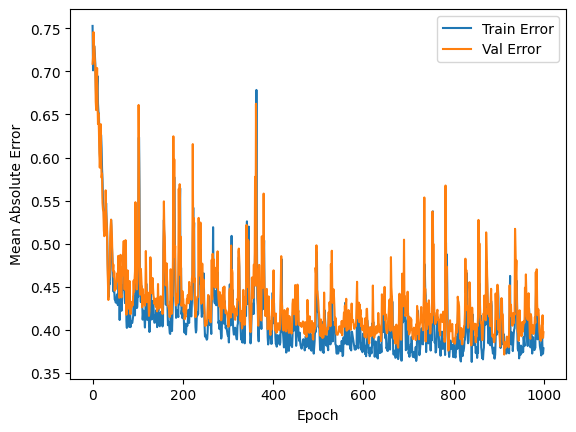

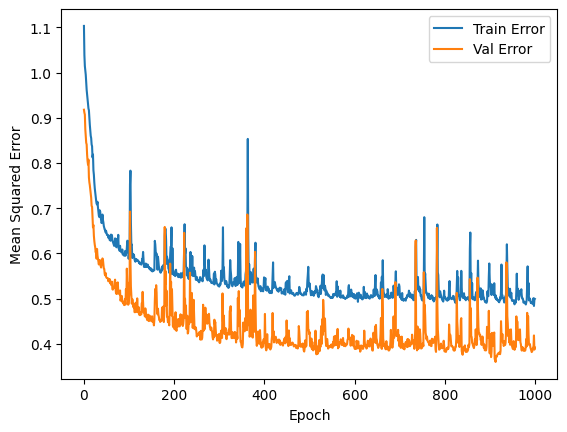

In [31]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
#   hist.to_csv('Adamax(10000).csv')
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
  plt.legend()

plot_history(history)

In [32]:
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('/content/drive/MyDrive/Research M.Sc Optics/model.h5')
# summarize model.
model.summary()
# load dataset

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1152      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 38467 (150.26 KB)
Trainable params: 3846

In [40]:
pre = model.predict(X_test)
y = y_test

cnt=0
for i in range(len(pre)):
#       print(y[i],'\t', pre[i],'\t', abs(y[i] - pre[i]))
      cnt = cnt + abs(y[i] - pre[i])
print('Absolute Error :', cnt)
print('ERROR :', metrics.mean_absolute_error(y,pre))


3/3 [==============================] - 0s 3ms/step
Absolute Error : [ 9.77858611 51.66898978 52.80146063]
ERROR : 0.47016064409131636


Core Real 0.9715385071070758
Core Imaginary 0.09115489847831904
Confinement Loss 0.10063909411111915


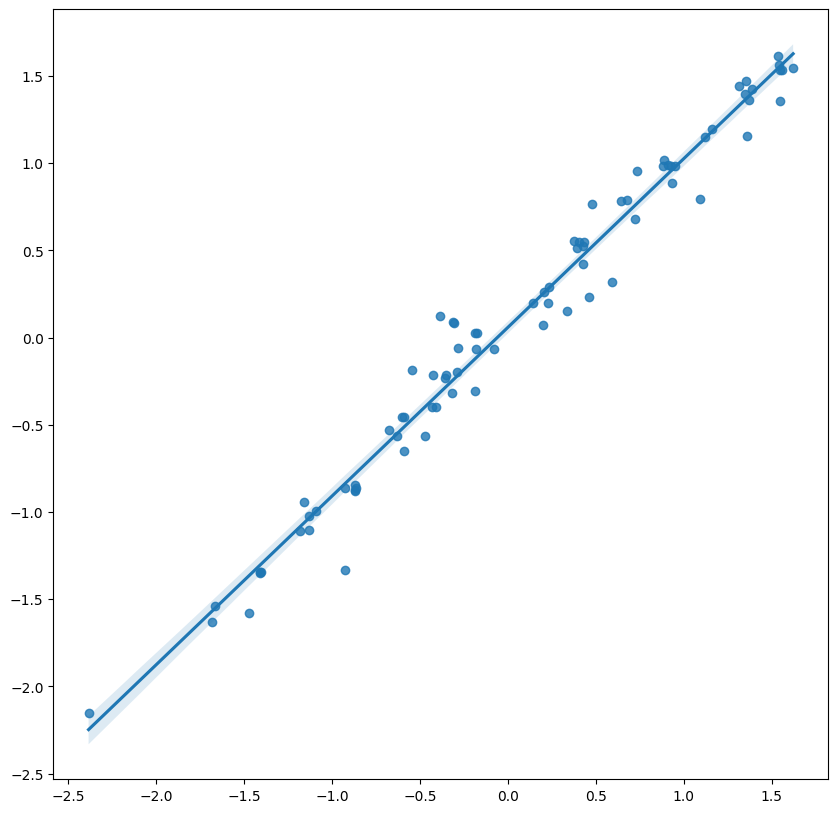

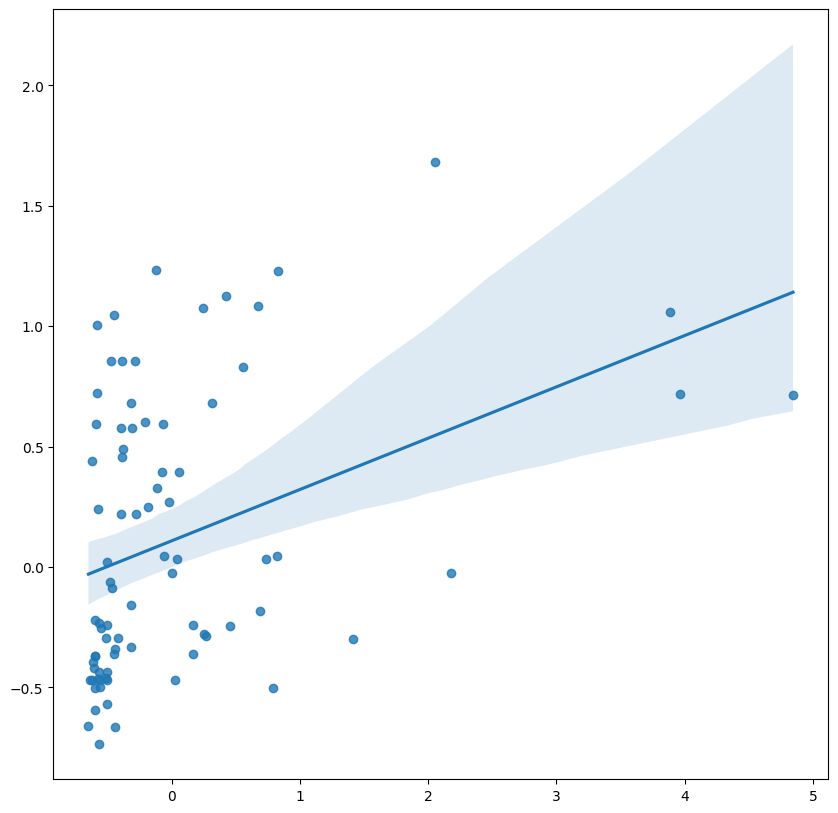

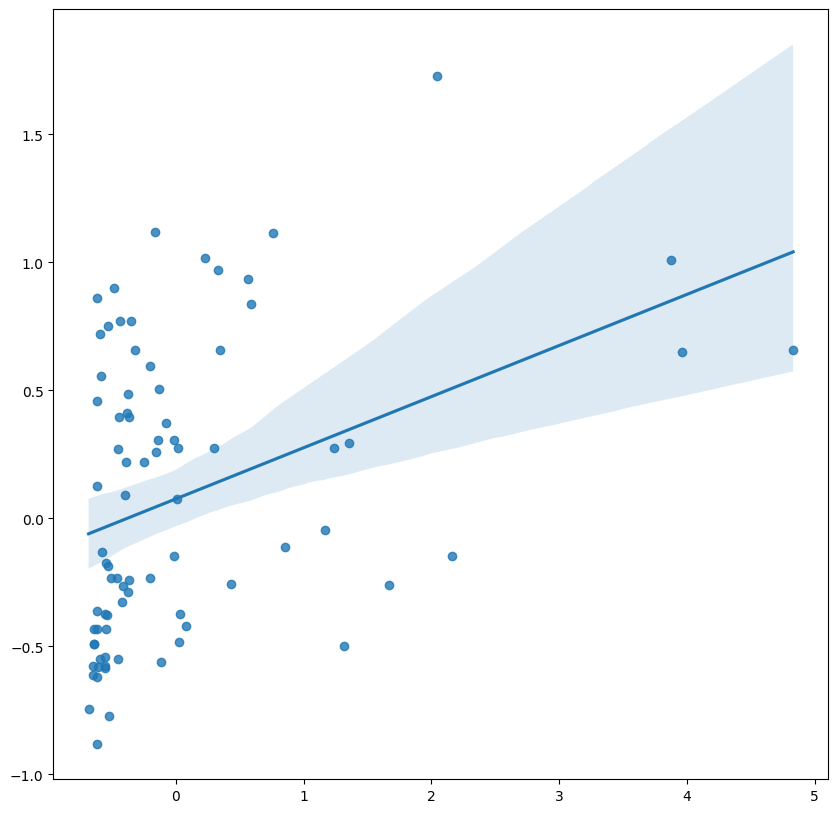

In [43]:
for l in range(3):
    print(tar[l], metrics.r2_score(y[:,l], pre[:,l]))

    plt.figure(figsize=(10,10))
    sb.regplot(x=y[:,l], y=pre[:,l])